# Question 3
题目要求首先分析过去5年的数据走势，然后分别预测未来3年的宠物食物产量和出口量

## 分析过去5年的数据走势
这里首先分析了中国宠物食品总产值（人民币 亿）`pet_food_output_value`和中国宠物食品出口总值（美元 亿）`pet_food_export_value`的历史数据走势，并绘制了折线图，观察其二者有没有什么联系。
其次，分析了

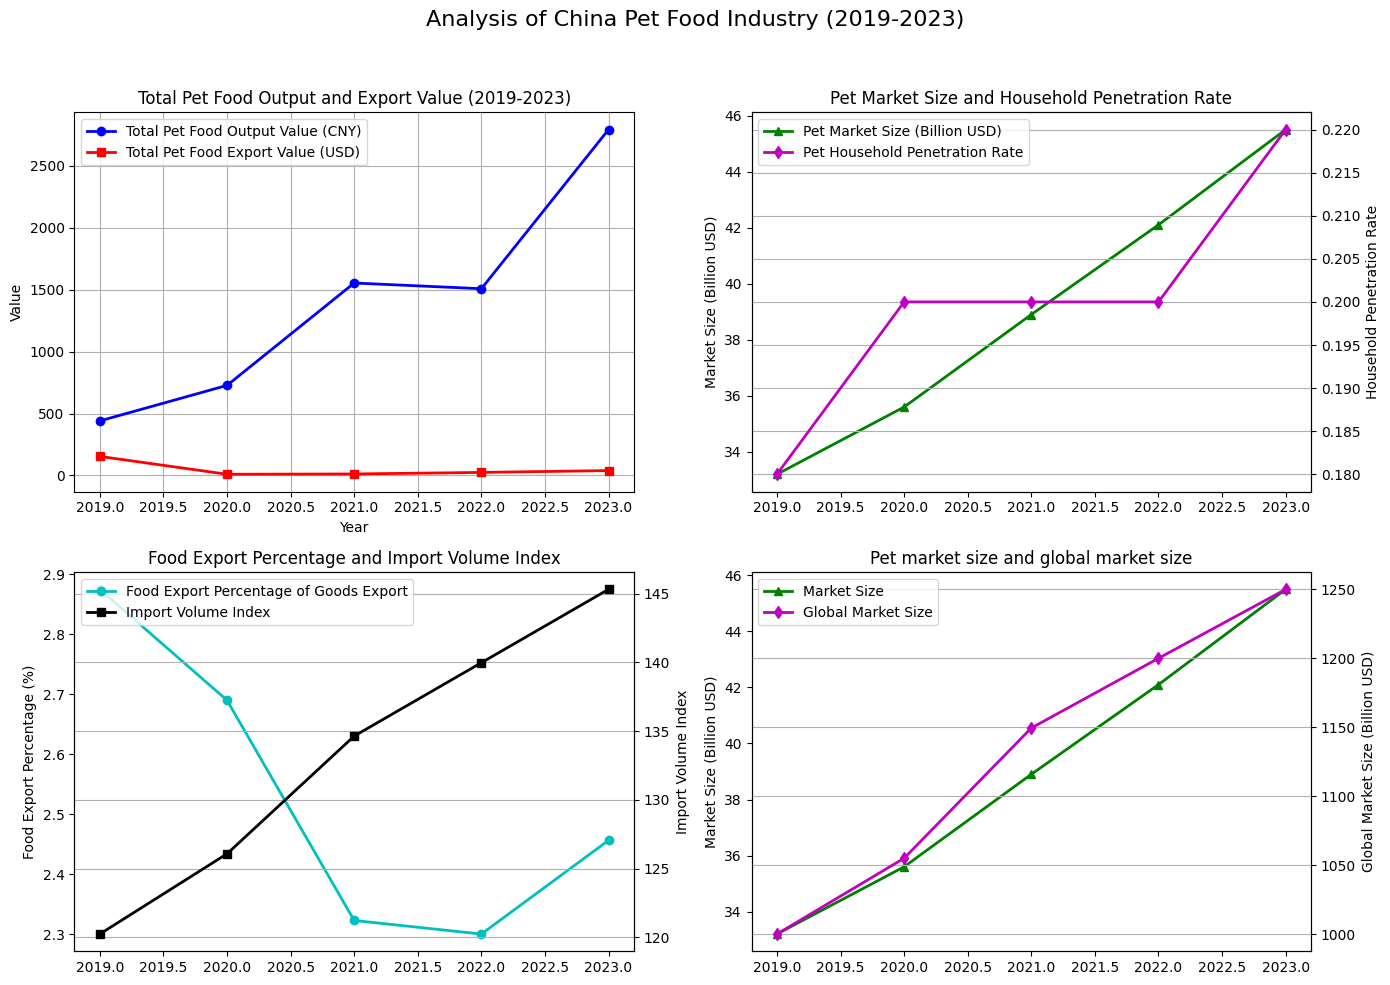

Correlation with Total Pet Food Output Value:
                        Correlation_Coefficients
Pet_Count                               0.945365
Market_Size                             0.955426
Household_Penetration                   0.908976
Food_Export_Percentage                 -0.658953
Import_Volume_Index                     0.942053
Population_Growth                      -0.936126
GDP_per_Capita                          0.819681
Global_Market_Size                      0.938685
energy_price_index                      0.734534
Correlation with Total Pet Food Export Value:
                        Correlation_Coefficients
Pet_Count                              -0.587632
Market_Size                            -0.511218
Household_Penetration                  -0.669797
Food_Export_Percentage                  0.732248
Import_Volume_Index                    -0.575373
Population_Growth                       0.590686
GDP_per_Capita                         -0.571555
Global_Market_Size        

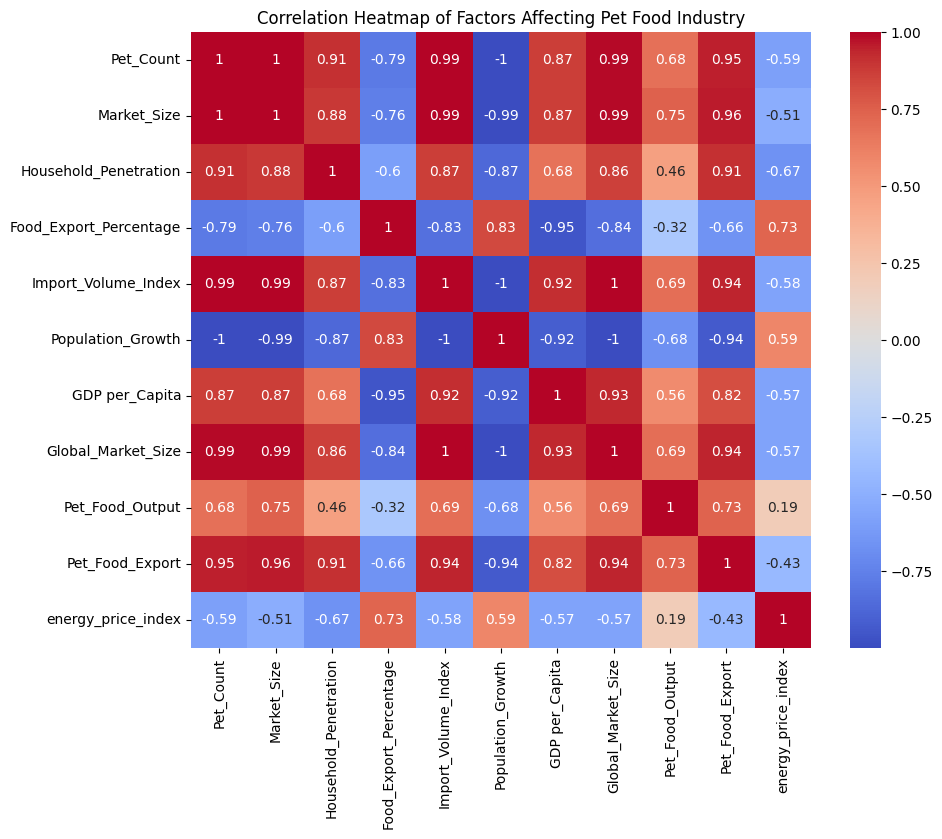

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
import seaborn as sns
# 1. 数据定义
years = np.array([2019, 2020, 2021, 2022, 2023])  # 历史年份
pet_count = np.array([99.8, 108.5, 115.4, 122.6, 130.2])  # 宠物数量（百万）
pet_food_output_value = np.array([440.7, 727.3, 1554, 1508, 2793])  # 中国宠物食品总产值（人民币 亿）
pet_food_export_value = np.array([154.1, 9.8, 12.2, 24.7, 39.6])  # 中国宠物食品出口总值（美元 亿）
market_size = np.array([33.2, 35.6, 38.9, 42.1, 45.5])  # 宠物市场规模（美元 亿）
pet_household_penetration = np.array([0.18, 0.2, 0.2, 0.2, 0.22])  # 宠物家庭渗透率
food_export_percentage = np.array([2.8745, 2.6897, 2.3228, 2.3002, 2.4563])  # 食品出口占商品出口的百分比
import_volume_index = np.array([120.23, 126.07, 134.64, 139.98, 145.32])  # 进口物量指数
population_growth = np.array([0.3547, 0.2380, 0.0893, -0.0131, -0.1038])  # 人口增长率（年度百分比）
gdp_per_capita = np.array([10143.86, 10408.72, 12617.51, 12662.58, 12614.06])  # 人均GDP（现价美元）
global_market_size = np.array([1000, 1055, 1149.42, 1200, 1250])  # 全球市场规模（美元 亿）
energy_price_index = np.array([90, 85, 88, 92, 95])  # 能源价格指数
# 2. 数据可视化分析
plt.figure(figsize=(14, 10))

# 宠物食品总产值和出口总值
plt.subplot(2, 2, 1)
plt.plot(years, pet_food_output_value, '-o', label='Total Pet Food Output Value (CNY)', linewidth=2, markersize=6, color='b')
plt.plot(years, pet_food_export_value, '-s', label='Total Pet Food Export Value (USD)', linewidth=2, markersize=6, color='r')
plt.title('Total Pet Food Output and Export Value (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# 子图
plt.subplot(2, 2, 2)
# 市场规模和宠物家庭渗透率
# 第一条折线：市场规模
line1, = plt.plot(years, market_size, '-^', label='Pet Market Size (Billion USD)', linewidth=2, markersize=6, color='g')
plt.ylabel('Market Size (Billion USD)')
# 创建共享 x 轴的第二个 y 轴
ax2 = plt.gca().twinx()
# 第二条折线：家庭渗透率
line2, = ax2.plot(years, pet_household_penetration, '-d', label='Pet Household Penetration Rate', linewidth=2, markersize=6, color='m')
ax2.set_ylabel('Household Penetration Rate')
# 添加标题和坐标轴标签
plt.title('Pet Market Size and Household Penetration Rate')
plt.xlabel('Year')
# 添加网格线
plt.grid(True)
# 合并图例
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')  # 图例位置可以调整

# 食品出口占比和进口物量指数
# 子图
plt.subplot(2, 2, 3)
# 第一条折线：食品出口占比
line1, = plt.plot(years, food_export_percentage, '-o', label='Food Export Percentage of Goods Export', linewidth=2, markersize=6, color='c')
plt.ylabel('Food Export Percentage (%)')  # 左边 Y 轴标签
# 创建共享 x 轴的第二个 y 轴
ax2 = plt.gca().twinx()
# 第二条折线：进口物量指数
line2, = ax2.plot(years, import_volume_index, '-s', label='Import Volume Index', linewidth=2, markersize=6, color='k')
ax2.set_ylabel('Import Volume Index')  # 右边 Y 轴标签
# 添加标题和坐标轴标签
plt.title('Food Export Percentage and Import Volume Index')
plt.xlabel('Year')
# 添加网格线
plt.grid(True)
# 合并图例
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')  # 图例位置为左上角

# 人口增长率和人均 GDP
# 子图
plt.subplot(2, 2, 4)
# 绘制中国宠物市场规模
line1, = plt.plot(years, market_size, '-^', label='Market Size', linewidth=2, markersize=6, color='g')
plt.ylabel('Market Size (Billion USD)')  # 左侧 Y 轴标签
# 创建共享 x 轴的右侧 Y 轴
ax2 = plt.gca().twinx()
# 绘制全球宠物市场规模
line2, = ax2.plot(years, global_market_size, '-d', label='Global Market Size', linewidth=2, markersize=6, color='m')
ax2.set_ylabel('Global Market Size (Billion USD)')  # 右侧 Y 轴标签
# 设置标题和 X 轴标签
plt.title('Pet market size and global market size')
plt.xlabel('Year')
# 合并图例
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')  # 图例显示在左上角

# 添加网格线
plt.grid(True)

# 总标题和布局调整
plt.suptitle('Analysis of China Pet Food Industry (2019-2023)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 3. 相关性分析
X = np.column_stack((pet_count, market_size, pet_household_penetration, food_export_percentage, import_volume_index, population_growth, gdp_per_capita, global_market_size,energy_price_index))

# 相关系数计算
corr_matrix_output = np.corrcoef(np.column_stack((X, pet_food_output_value)).T)[-1, :-1]
corr_matrix_export = np.corrcoef(np.column_stack((X, pet_food_export_value)).T)[-1, :-1]

# 输出相关系数结果
output_corr_df = pd.DataFrame({'Correlation_Coefficients': corr_matrix_output},
                              index=['Pet_Count', 'Market_Size', 'Household_Penetration', 'Food_Export_Percentage', 'Import_Volume_Index', 'Population_Growth', 'GDP_per_Capita', 'Global_Market_Size','energy_price_index'])
export_corr_df = pd.DataFrame({'Correlation_Coefficients': corr_matrix_export},
                              index=['Pet_Count', 'Market_Size', 'Household_Penetration', 'Food_Export_Percentage', 'Import_Volume_Index', 'Population_Growth', 'GDP_per_Capita', 'Global_Market_Size','energy_price_index'])

print('Correlation with Total Pet Food Output Value:')
print(output_corr_df)

print('Correlation with Total Pet Food Export Value:')
print(export_corr_df)

# 4. 相关性热力图可视化
corr_matrix = np.corrcoef(np.column_stack((X, pet_food_output_value, pet_food_export_value)).T)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=['Pet_Count', 'Market_Size', 'Household_Penetration', 'Food_Export_Percentage', 'Import_Volume_Index', 'Population_Growth', 'GDP per_Capita', 'Global_Market_Size', 'Pet_Food_Output', 'Pet_Food_Export','energy_price_index'],
            yticklabels=['Pet_Count', 'Market_Size', 'Household_Penetration', 'Food_Export_Percentage', 'Import_Volume_Index', 'Population_Growth', 'GDP per_Capita', 'Global_Market_Size', 'Pet_Food_Output', 'Pet_Food_Export','energy_price_index'])
plt.title('Correlation Heatmap of Factors Affecting Pet Food Industry')
plt.show()

# 5. 结论
# 宠物数量、市场规模和全球市场规模对中国宠物食品总产值和出口总值有明显的相关性，而人口增长率和家庭渗透率对于宠物食品的影响相对小。
# 市场规模也显示了进一步的增长，同时宠物家庭渗透率也有所提高。
# 宠物食品总产值在过去几年中显著增长，特别是在2021年到2023年之间，但出口总值在某些年度有所低起。
# 宠物市场随着国际市场的增长而增长，受到全球市场规模的影响。



# 预测未来产量+出口 of pet food industry
使用各个方法+权重优化
首先


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
import seaborn as sns
# 1. 数据定义
years = np.array([2019, 2020, 2021, 2022, 2023])  # 历史年份
pet_count = np.array([99.8, 108.5, 115.4, 122.6, 130.2])  # 宠物数量（百万）
pet_food_output_value = np.array([440.7, 727.3, 1554, 1508, 2793])  # 中国宠物食品总产值（人民币 亿）
pet_food_export_value = np.array([154.1, 9.8, 12.2, 24.7, 39.6])  # 中国宠物食品出口总值（美元 亿）
market_size = np.array([33.2, 35.6, 38.9, 42.1, 45.5])  # 宠物市场规模（美元 亿）
pet_household_penetration = np.array([0.18, 0.2, 0.2, 0.2, 0.22])  # 宠物家庭渗透率
food_export_percentage = np.array([2.8745, 2.6897, 2.3228, 2.3002, 2.4563])  # 食品出口占商品出口的百分比
import_volume_index = np.array([120.23, 126.07, 134.64, 139.98, 145.32])  # 进口物量指数
population_growth = np.array([0.3547, 0.2380, 0.0893, -0.0131, -0.1038])  # 人口增长率（年度百分比）
gdp_per_capita = np.array([10143.86, 10408.72, 12617.51, 12662.58, 12614.06])  # 人均GDP（现价美元）
global_market_size = np.array([1000, 1055, 1149.42, 1200, 1250])  # 全球市场规模（美元 亿）
exchange_rate = np.array([6.9, 6.7, 6.5, 6.4, 6.3])  # 人民币对美元汇率
energy_price_index = np.array([90, 85, 88, 92, 95])  # 能源价格指数
# Normalize features to improve numerical stability
scaler_export = StandardScaler()
scaler_import = StandardScaler()
scaler_pet = StandardScaler()

# 2. 相关性回归模型构建
# 提取与出口、进口相关的特征
X_export = np.column_stack((food_export_percentage, population_growth, gdp_per_capita, exchange_rate, energy_price_index))  # 与出口相关的特征
X_import = np.column_stack((pet_count, market_size, import_volume_index, global_market_size, gdp_per_capita, energy_price_index))  # 与进口相关的特征

# Normalize features using separate scalers
X_export_normalized = scaler_export.fit_transform(X_export)
X_import_normalized = scaler_import.fit_transform(X_import)

# 构建回归模型
export_model = LinearRegression().fit(X_export_normalized, pet_food_export_value)  # 出口模型
import_model = LinearRegression().fit(X_import_normalized, pet_food_output_value)  # 进口模型



In [15]:
# 3. 预测未来三年的人口增长率和人均GDP
years_future = np.array([2025, 2026, 2027])  # 未来三年
pop_growth_rate_future = np.array([-0.15, -0.18, -0.20])  # 未来三年人口增长率
gdp_per_capita_future = gdp_per_capita[-1] * (1 + 0.05) ** np.arange(1, 4)  # 人均GDP年增长率5%
exchange_rate_future = exchange_rate[-1] * (1 - 0.02) ** np.arange(1, 4)  # 假设未来三年汇率下降 2%
energy_price_index_future = energy_price_index[-1] * (1 + 0.03) ** np.arange(1, 4)  # 能源价格指数年增长率 3%

# 未来市场规模预测
years_market_future = np.array([2024, 2025, 2026])
market_size_future = np.array([1409, 1482, 1559])

# 4. 构建未来宠物数量预测模型
# 使用人均 GDP 和人口增长率预测未来宠物数量
X_pet = np.column_stack((gdp_per_capita, population_growth))
X_pet_normalized = scaler_pet.fit_transform(X_pet)

# 线性回归模型
pet_count_linear_model = LinearRegression().fit(X_pet_normalized, pet_count)
X_future_pet = np.column_stack((gdp_per_capita_future, pop_growth_rate_future))
X_future_pet_normalized = scaler_pet.transform(X_future_pet)
pet_count_linear = pet_count_linear_model.predict(X_future_pet_normalized)

# 多项式回归模型
poly_order = 2
pet_count_poly_coeff = np.polyfit(years, pet_count, poly_order)
pet_count_poly = np.polyval(pet_count_poly_coeff, np.concatenate((years, years_future)))

# 非线性回归模型 (使用Logarithmic替代指数模型)
def log_model(x, a, b):
    return a * np.log(x + 1) + b  # 加1以避免log(0)

try:
    popt, _ = curve_fit(log_model, years, pet_count, maxfev=10000)
    pet_count_nonlinear = log_model(np.concatenate((years, years_future)), *popt)
except (RuntimeError, OverflowError) as e:
    print(f"Nonlinear regression failed: {e}")
    pet_count_nonlinear = np.full(len(years) + len(years_future), np.nan)

# 5. 加权组合预测未来宠物数量
# 确保预测值长度匹配
num_years = len(years)
regression_pred = pet_count_linear[:min(num_years, len(pet_count_linear))]  # 线性回归的历史部分
poly_pred = pet_count_poly[:min(num_years, len(pet_count_poly))]  # 多项式回归的历史部分
nonlinear_pred = pet_count_nonlinear[:min(num_years, len(pet_count_nonlinear))]  # 非线性回归的历史部分

# 如果预测值长度不一致，则补齐
max_length = max(len(regression_pred), len(poly_pred), len(nonlinear_pred))
regression_pred = np.pad(regression_pred, (0, max_length - len(regression_pred)), 'edge')
poly_pred = np.pad(poly_pred, (0, max_length - len(poly_pred)), 'edge')
nonlinear_pred = np.pad(nonlinear_pred, (0, max_length - len(nonlinear_pred)), 'edge')

# 初始权重
w0 = [1/3, 1/3, 1/3]

# 目标函数：最小化误差（MSE）
def objective(w):
    return np.mean((w[0] * regression_pred + w[1] * poly_pred + w[2] * nonlinear_pred - pet_count[:max_length]) ** 2)

# 约束条件：w1 + w2 + w3 = 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# 下界和上界
bounds = [(0, 1), (0, 1), (0, 1)]

# 使用 scipy.optimize.minimize 进行优化
result = minimize(objective, w0, bounds=bounds, constraints=constraints)
optimal_weights = result.x

# 使用优化后的权重预测未来宠物数量
poly_future = pet_count_poly[-3:]
nonlinear_future = pet_count_nonlinear[-3:]
pet_count_weighted_future = (
    optimal_weights[0] * pet_count_linear[-3:] +
    optimal_weights[1] * poly_future +
    optimal_weights[2] * nonlinear_future
)






# 6. Export Prediction
svr_export_model = SVR(kernel='rbf').fit(X_export_normalized, pet_food_export_value)
export_features_future = np.column_stack((food_export_percentage[-1] * (1 + 0.05) ** np.arange(1, 4), pop_growth_rate_future, gdp_per_capita_future, exchange_rate_future, energy_price_index_future))

# Continue the normalization for future export features
export_features_future_normalized = scaler_export.transform(export_features_future)

# Predicting future export values using SVR
pet_food_export_value_svr_future = svr_export_model.predict(export_features_future_normalized)

# Random Forest Regression Model for Export
random_forest_export_model = RandomForestRegressor(n_estimators=50, random_state=42).fit(X_export_normalized, pet_food_export_value)
pet_food_export_value_rf_future = random_forest_export_model.predict(export_features_future_normalized)

# Additional Plot for Comparison of Export Predictions
plt.figure(figsize=(10, 6))
plt.plot(np.concatenate((years, years_future)), np.concatenate((pet_food_export_value, pet_food_export_value_svr_future)), '-s', label='SVR Export Prediction', linewidth=2, markersize=6, color='r')
plt.plot(np.concatenate((years, years_future)), np.concatenate((pet_food_export_value, pet_food_export_value_rf_future)), '-d', label='Random Forest Export Prediction', linewidth=2, markersize=6, color='g')
plt.plot(np.concatenate((years, years_future)), np.concatenate((pet_food_export_value, export_model.predict(export_features_future_normalized))), '-^', label='Linear Regression Export Prediction', linewidth=2, markersize=6, color='b')
plt.title('Comparison of Pet Food Export Predictions (2019-2027)')
plt.xlabel('Year')
plt.ylabel('Export Value (Billion USD)')
plt.legend()
plt.grid(True)
plt.show()

# Output predictions for reference
print('Predicted Pet Food Export Value (2025-2027) using Different Models:')
for i, year in enumerate(years_future):
    print(f'Year {year}:')
    print(f' - SVR Prediction: {pet_food_export_value_svr_future[i]:.2f} Billion USD')
    print(f' - Random Forest Prediction: {pet_food_export_value_rf_future[i]:.2f} Billion USD')
    print(f' - Linear Regression Prediction: {export_model.predict([export_features_future_normalized[i]])[0]:.2f} Billion USD')


NameError: name 'exchange_rate' is not defined